In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [3]:
#As we can see lot of null values in data sets
vehicle_df.dropna(axis=0,inplace=True)

In [4]:
vehicle_df.isnull().values.any()
#Now there are no null values

False

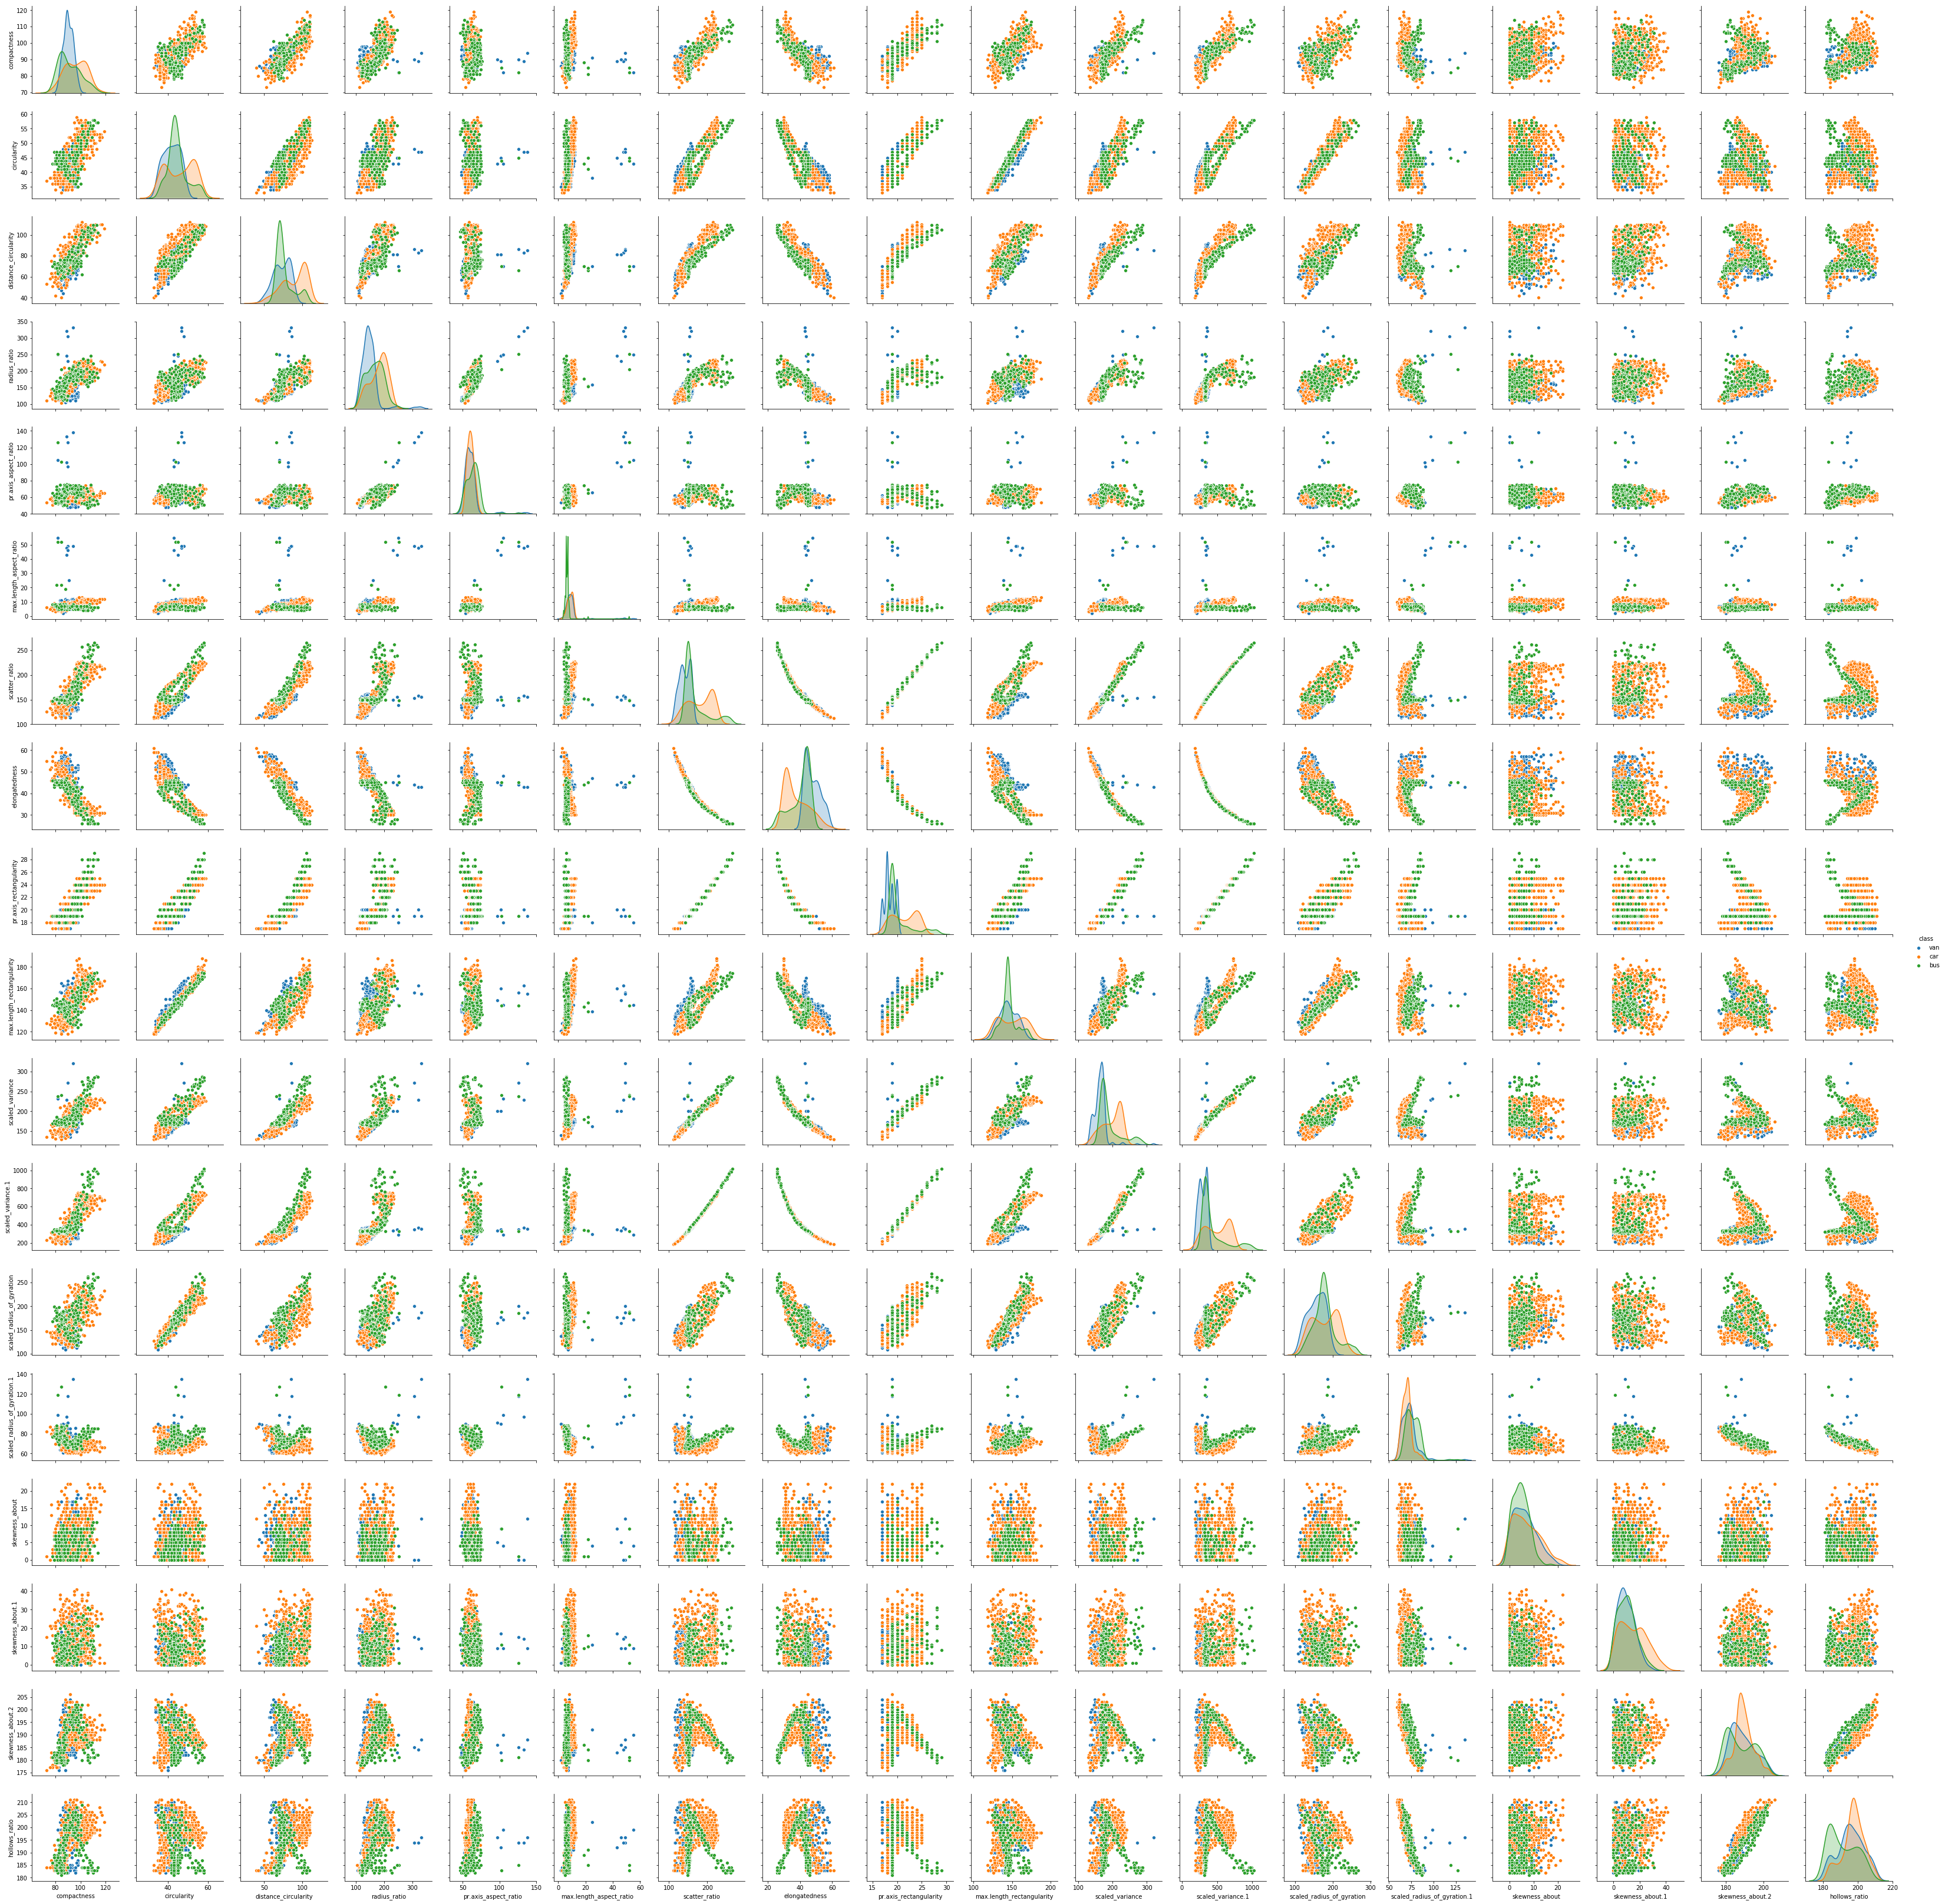

In [5]:
import seaborn as sns
sns.pairplot(vehicle_df, hue='class' , diag_kind= 'kde')

In [6]:
vehicle_df.corr()
#As per below correlation table I assume that skewness_about and skewness_about.1 has correlation values very close to 0.
#We will try drop these values and see if that improves our model predictions.
#Also skewness_about.2 has also correlation value close to 0 but against hollow ratio it is close to 1 so I assume not dropping that

#Most of the columns are very strongly correlated to each other either negative or positive.

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.689885              0.789955   
circularity                     0.689885     1.000000              0.797704   
distance_circularity            0.789955     0.797704              1.000000   
radius_ratio                    0.688130     0.623950              0.771404   
pr.axis_aspect_ratio            0.090557     0.155023              0.163386   
max.length_aspect_ratio         0.150369     0.251619              0.265591   
scatter_ratio                   0.814026     0.858149              0.909023   
elongatedness                  -0.788051    -0.825108             -0.912713   
pr.axis_rectangularity          0.814227     0.856137              0.897261   
max.length_rectangularity       0.674902     0.965366              0.773459   
scaled_variance                 0.764386     0.806108              0.865683   
scaled_variance.1               0.820240     0.850932              0.891789   
scaled_radius_of_gyration       0.581405     0.935594              0.705689   
scaled_radius_of_gyration.1    -0.258437     0.049070             -0.238145   
skewness_about                  0.231648     0.141726              0.110280   
skewness_about.1                0.168384    -0.001975              0.277851   
skewness_about.2                0.296195    -0.113902              0.145258   
hollows_ratio                   0.372806     0.049331              0.343228   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.688130              0.090557   
circularity                      0.623950              0.155023   
distance_circularity             0.771404              0.163386   
radius_ratio                     1.000000              0.667375   
pr.axis_aspect_ratio             0.667375              1.000000   
max.length_aspect_ratio          0.452460              0.652093   
scatter_ratio                    0.743470              0.113696   
elongatedness                   -0.795761             -0.191193   
pr.axis_rectangularity           0.716210              0.086992   
max.length_rectangularity        0.570478              0.133553   
scaled_variance                  0.806788              0.290375   
scaled_variance.1                0.731773              0.100668   
scaled_radius_of_gyration        0.544636              0.135663   
scaled_radius_of_gyration.1     -0.175348              0.173060   
skewness_about                   0.044693             -0.059244   
skewness_about.1                 0.178079             -0.040769   
skewness_about.2                 0.375591              0.229702   
hollows_ratio                    0.470895              0.257566   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.150369       0.814026   
circularity                                 0.251619       0.858149   
distance_circularity                        0.265591       0.909023   
radius_ratio                                0.452460       0.743470   
pr.axis_aspect_ratio                        0.652093       0.113696   
max.length_aspect_ratio                     1.000000       0.171445   
scatter_ratio                               0.171445       1.000000   
elongatedness                              -0.183242      -0.973413   
pr.axis_rectangularity                      0.167514       0.991992   
max.length_rectangularity                   0.309180       0.808154   
scaled_variance                             0.331124       0.950067   
scaled_variance.1                           0.150069       0.996396   
scaled_radius_of_gyration                   0.197179       0.795748   
scaled_radius_of_gyration.1                 0.308329      -0.045632   
skewness_about                              0.016461       0.070118   
skewness_about.1                            0.041210       0.227375   
skewness_about.2                           -0.

In [111]:
#As from the SNS plot we can see lon tails which may be because of outliers and lets try adjusting outliers.
#We will replace those outliers with Q1 and Q3 below
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [208]:
for column in vehicle_df.columns:
    if (column=='class'):
        break
    q1=np.percentile(vehicle_df[column],25)
    q3=np.percentile(vehicle_df[column],75)
    IQR = q3-q1
    value_new = q3+1.5*IQR
    
    new_vehicle_df = vehicle_df.mask(vehicle_df[column]>q3,other=q3)
    

C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


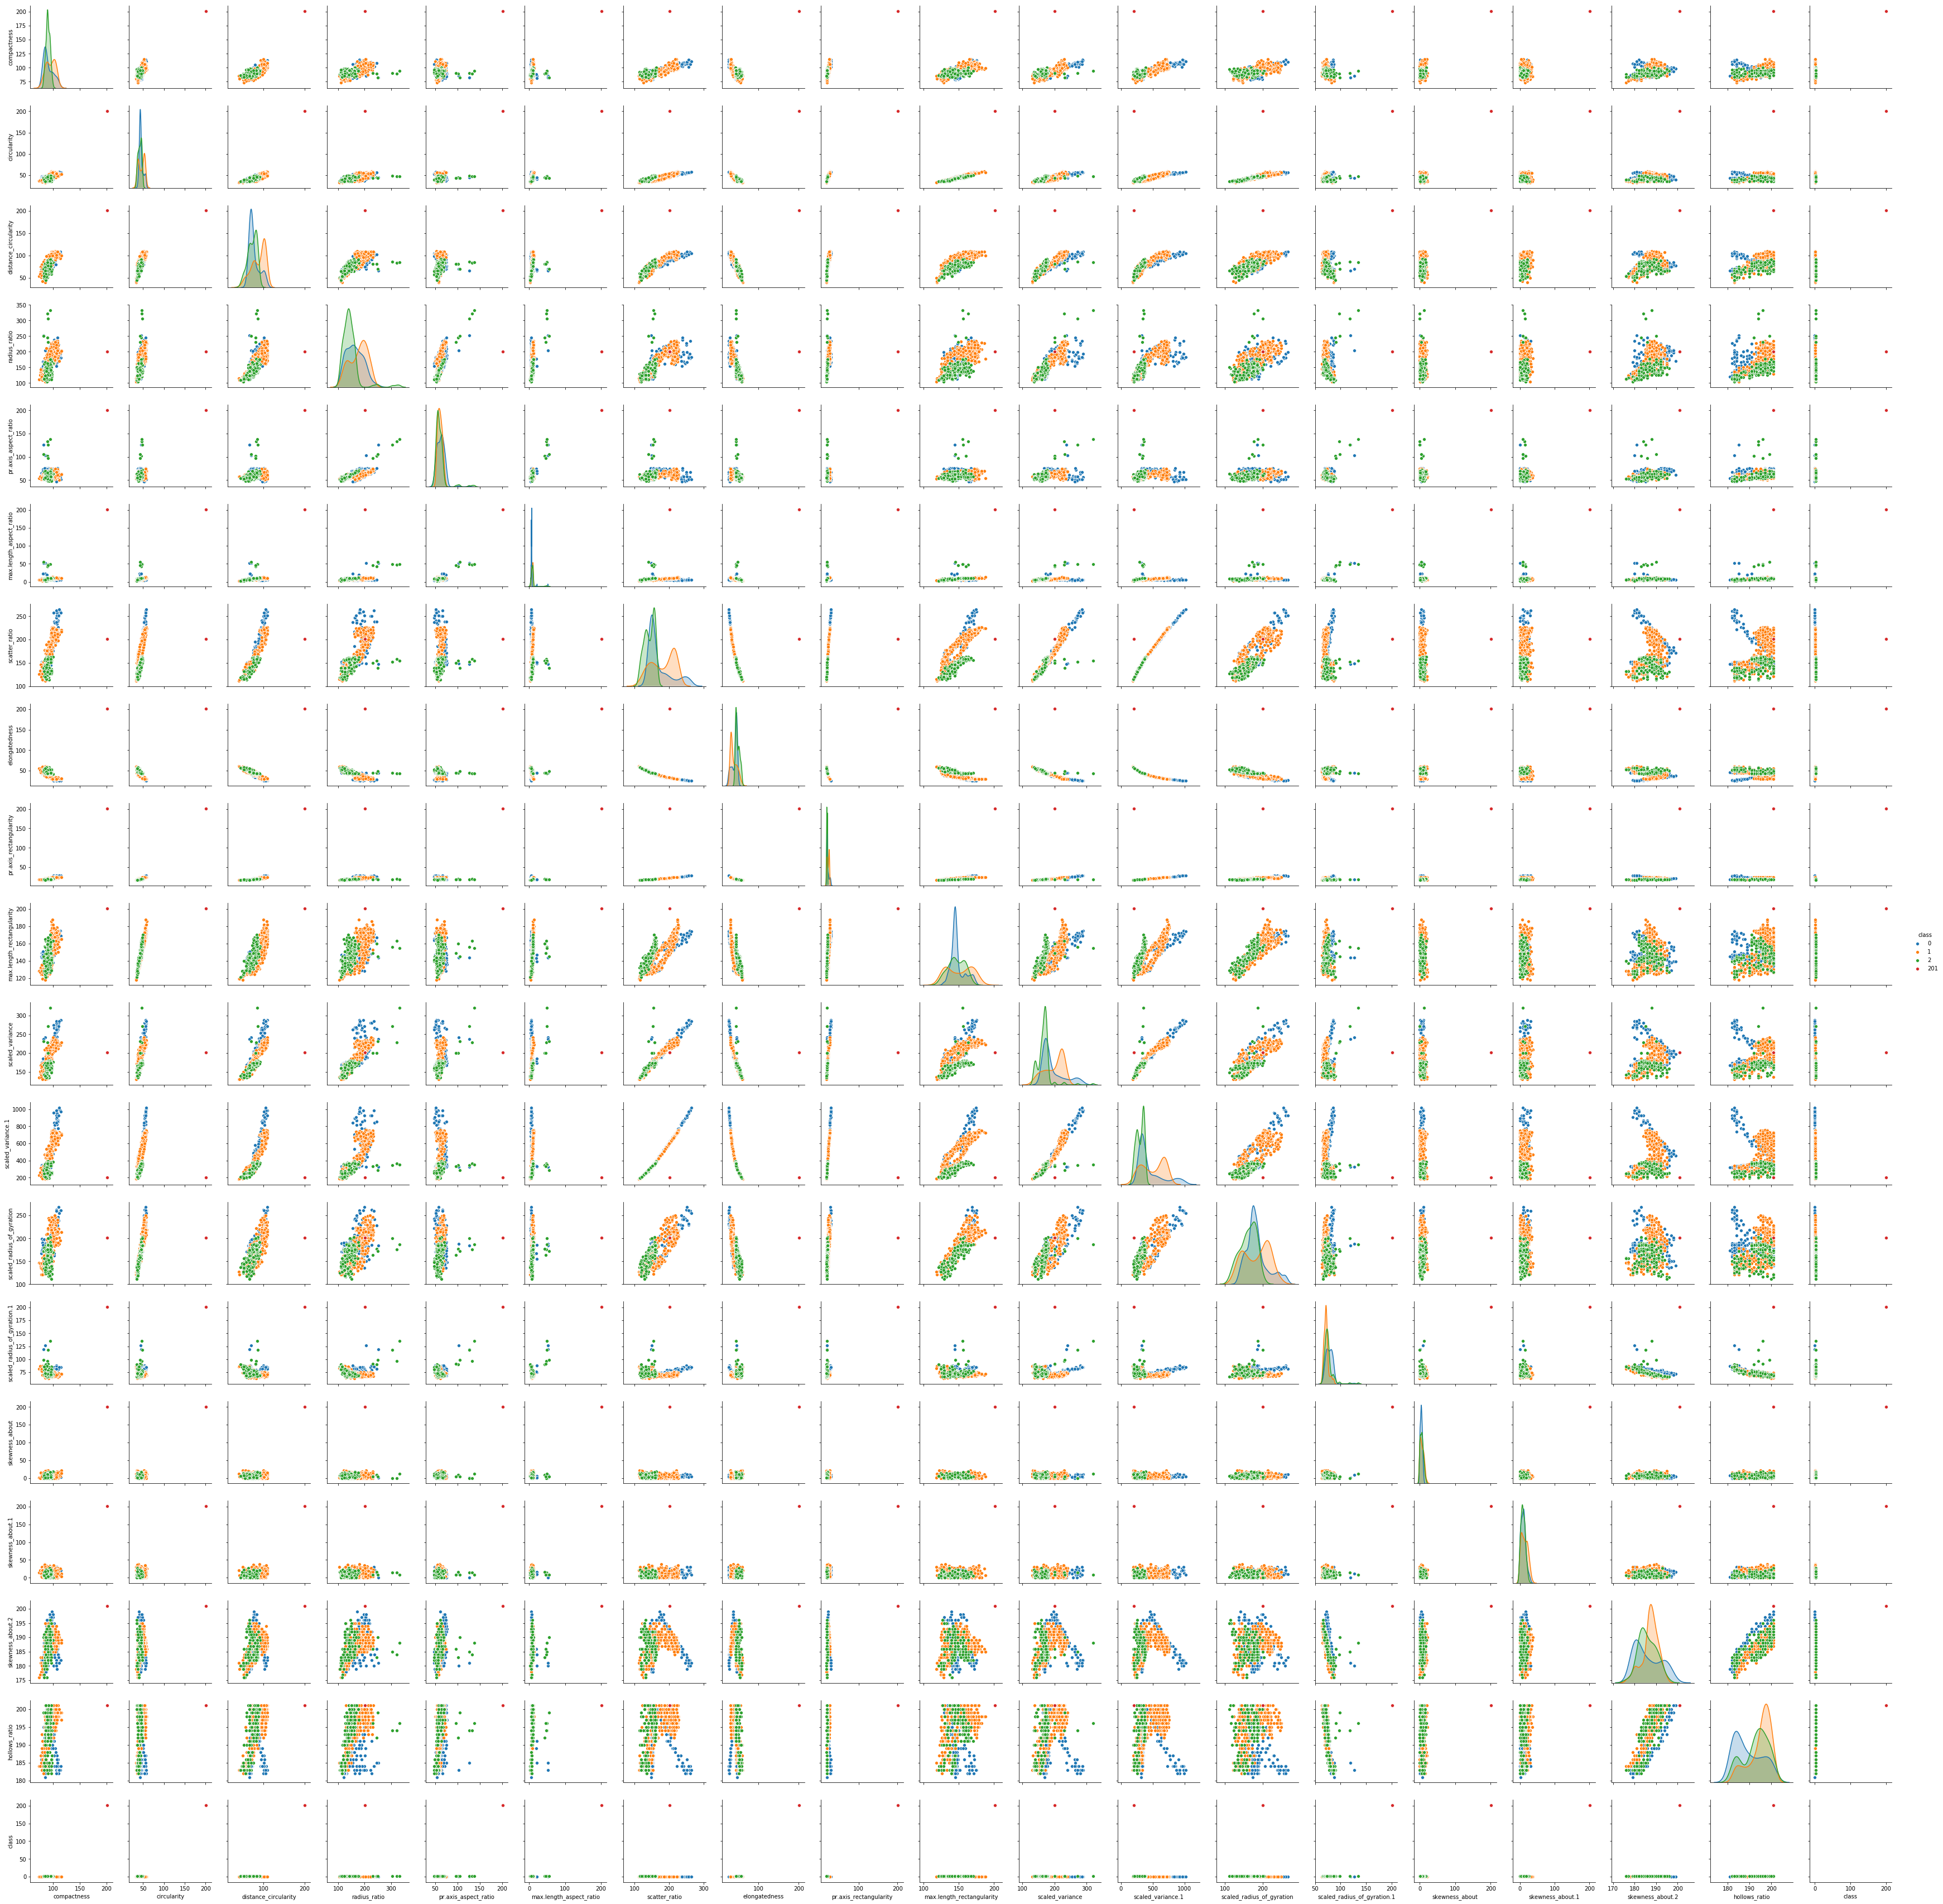

In [194]:
sns.pairplot(new_vehicle_df, hue='class' , diag_kind= 'kde')
#Graph below has now ultiple peaks because the vlaues are replaces.

In [210]:
#Lets convert class column to numeric values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
new_vehicle_df['class']= label_encoder.fit_transform(new_vehicle_df['class'])
new_vehicle_df['class'].unique()


array([2, 1, 3, 0], dtype=int64)

In [211]:
#Lets split the dataset into independent and dependent variables
X_new=new_vehicle_df.drop(labels='class',axis=1)
y_new=new_vehicle_df['class']


In [212]:
from sklearn.model_selection import train_test_split  
X_tr, X_te, y_tr, y_te = train_test_split(X_new, y_new, test_size = 0.30) 

In [213]:
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression()
regression_model.fit(X_tr, y_tr)

C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [214]:
regression_model.score(X_te,y_te)

0.9672131147540983

In [14]:
#Lets Try Doing PCA
from sklearn.preprocessing import StandardScaler

In [15]:
#Lets conduct standard scaling to X_train and X_test
sc = StandardScaler()
X_train_std =  sc.fit_transform(X)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00123153  0.69073497  0.79092746  0.68897729  0.09066804  0.1505537
   0.81502868 -0.78902127  0.81522961  0.67573322  0.76532752  0.82125027
   0.58212123 -0.25875528  0.23193313  0.16859183  0.29656022  0.3732647 ]
 [ 0.69073497  1.00123153  0.79868656  0.62471862  0.15521415  0.25192897
   0.85920548 -0.8261242   0.85719089  0.96655501  0.80710097  0.85197956
   0.93674669  0.0491303   0.1419004  -0.00197723 -0.1140426   0.04939203]
 [ 0.79092746  0.79868656  1.00123153  0.77235395  0.16358689  0.26591783
   0.91014241 -0.9138366   0.89836576  0.77441118  0.86674929  0.89288735
   0.70655787 -0.23843852  0.11041593  0.278193    0.14543699  0.34365085]
 [ 0.68897729  0.62471862  0.77235395  1.00123153  0.66819724  0.45301698
   0.74438595 -0.79674104  0.71709175  0.57118076  0.80778118  0.73267385
   0.54530637 -0.17556405  0.04474816  0.17829807  0.37605357  0.47147529]
 [ 0.09066804  0.15521415  0.16358689  0.66819724  1.00123153  0.6528959
   0.11383635 

C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.74447428e-01  1.27105989e-01 -1.15778231e-01 -8.00766389e-02
   7.01971756e-02  1.41269187e-01  4.78882430e-01 -5.51289488e-01
   4.70291162e-01  2.71011706e-01 -3.88480982e-02  3.37118452e-02
   1.68590056e-01 -4.08522941e-02  3.33699383e-02  4.49941671e-02
  -8.72862091e-03  4.27500161e-04]
 [ 2.94003600e-01 -1.34430321e-01 -3.64513515e-02 -1.90342131e-01
  -8.66726774e-02 -2.78132128e-01 -2.32112671e-01 -1.77146565e-01
   8.14934003e-03 -8.72464933e-02  1.10855608e-02 -1.12606467e-01
  -6.30087058e-02  1.60416148e-01 -4.20446984e-01  6.57048309e-01
  -1.69794331e-01  1.73650656e-02]
 [ 3.04380218e-01  7.21448351e-02 -5.51881577e-02  6.93709791e-02
   3.89590342e-02 -1.36322721e-01  6.01737282e-02  4.36495932e-01
   1.76997855e-01  2.14799970e-01 -7.02546566e-01 -2.85482662e-02
  -2.16299609e-01 -2.13651022e-01 -1.19627607e-01 -2.21685599e-02
   2.86460253e-02 -1.13772044e-02]
 [ 2.68888600e-01  1.76416250e-01  2.81804540e-01  4.46505645e-02
  -4.36633252e-02  

In [17]:
# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

[(9.453386999070815, array([ 0.27444743,  0.2940036 ,  0.30438022,  0.2688886 ,  0.08301999,
        0.09848255,  0.31668895, -0.31320505,  0.31361223,  0.28128567,
        0.30916156,  0.31416351,  0.27033732, -0.02560369,  0.03967995,
        0.06316001,  0.03094103,  0.07936613])), (2.9896188751110633, array([ 0.12710599, -0.13443032,  0.07214484,  0.17641625,  0.09876335,
       -0.03020685, -0.04438994, -0.01525397, -0.0572306 , -0.12032438,
       -0.06190968, -0.0480211 , -0.2101697 , -0.4937938 ,  0.05626019,
        0.12103543,  0.5444917 ,  0.53888165])), (1.9176872101272058, array([-0.11577823, -0.03645135, -0.05518816,  0.28180454,  0.64576888,
        0.58641235, -0.09858482,  0.05665152, -0.11203925, -0.02413247,
        0.05972347, -0.10945278, -0.0370631 ,  0.27577954, -0.11019178,
       -0.08049935,  0.031728  ,  0.05694625])), (1.1701169611149138, array([-0.08007664, -0.19034213,  0.06937098,  0.04465056, -0.03005322,
       -0.0297503 ,  0.09441724, -0.08506744,  0.

In [18]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be enteries equal to o of columns in x_train)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. 
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.52454218 0.69042782 0.79683496 0.8617615  0.91331437 0.94284307
 0.96276707 0.97510526 0.98376643 0.98891671 0.99244177 0.99490496
 0.99683383 0.99801073 0.99890493 0.99963225 0.9999797  1.        ]


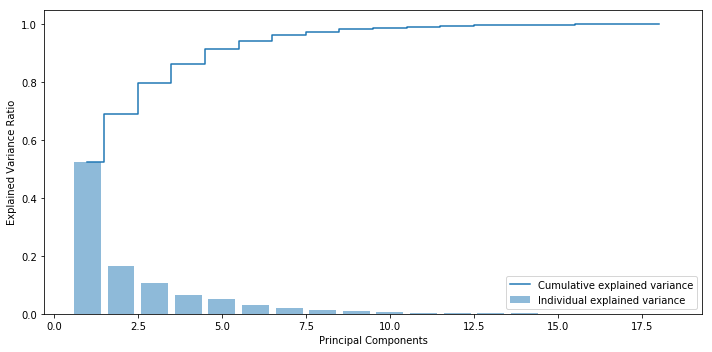

In [19]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_explained, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [20]:
# P_reduce represents reduced mathematical space....
#Since we can see very negligible variance after 13 dimensions

P_reduce = np.array(train_eigvectors_sorted[0:15])   # Reducing to 13 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot



In [79]:
#Lets Do PCA anc create 12 Dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components=14)


In [80]:
principalComponents = pca.fit_transform(X_train_std)
principalDf = pd.DataFrame(data = principalComponents
             )
principalDf.head()

0         1          2         3         4         5         6   \
0  0.352249 -0.141027   0.961832  0.190872  0.069616 -0.740301 -0.882080   
1 -1.578072 -0.422197  -0.365261  0.239334  0.685899 -0.530580  0.345639   
2  3.782556  0.253257   0.061756  1.216416  0.717337  0.728388 -0.015941   
3 -1.713214 -2.819496   0.186835  0.379588 -0.357389 -0.514101  0.450872   
4  0.532165  5.153595  11.400516  0.066717  3.242363 -0.360525  2.569695   

         7         8         9         10        11        12        13  
0 -0.388323 -0.908189  0.087236  0.011048  0.035379 -0.185637 -0.202200  
1  0.258324  0.137883 -0.093291  0.497768 -0.265891 -0.040406 -0.070293  
2  0.478896 -0.275968 -0.477401  0.258087 -0.144333 -0.058469 -0.061558  
3 -0.011059 -0.061825  0.456355  0.374730  0.029172  0.191231 -0.235635  
4 -0.400351  2.111091 -0.332323  0.201103 -0.137255 -0.131083 -0.379950

In [81]:
#Lets combine the dependent variable Y to the PCA datadframe
finalDF = pd.concat([principalDf,vehicle_df['class']],axis=1)
finalDF.head()

0         1          2         3         4         5         6  \
0  0.352249 -0.141027   0.961832  0.190872  0.069616 -0.740301 -0.882080   
1 -1.578072 -0.422197  -0.365261  0.239334  0.685899 -0.530580  0.345639   
2  3.782556  0.253257   0.061756  1.216416  0.717337  0.728388 -0.015941   
3 -1.713214 -2.819496   0.186835  0.379588 -0.357389 -0.514101  0.450872   
4  0.532165  5.153595  11.400516  0.066717  3.242363 -0.360525  2.569695   

          7         8         9        10        11        12        13  class  
0 -0.388323 -0.908189  0.087236  0.011048  0.035379 -0.185637 -0.202200    2.0  
1  0.258324  0.137883 -0.093291  0.497768 -0.265891 -0.040406 -0.070293    2.0  
2  0.478896 -0.275968 -0.477401  0.258087 -0.144333 -0.058469 -0.061558    1.0  
3 -0.011059 -0.061825  0.456355  0.374730  0.029172  0.191231 -0.235635    2.0  
4 -0.400351  2.111091 -0.332323  0.201103 -0.137255 -0.131083 -0.379950    0.0

In [82]:
pca.explained_variance_ratio_

array([0.52454218, 0.16588564, 0.10640714, 0.06492654, 0.05155287,
       0.0295287 , 0.01992401, 0.01233818, 0.00866117, 0.00515028,
       0.00352506, 0.00246319, 0.00192887, 0.0011769 ])

C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\divakarjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


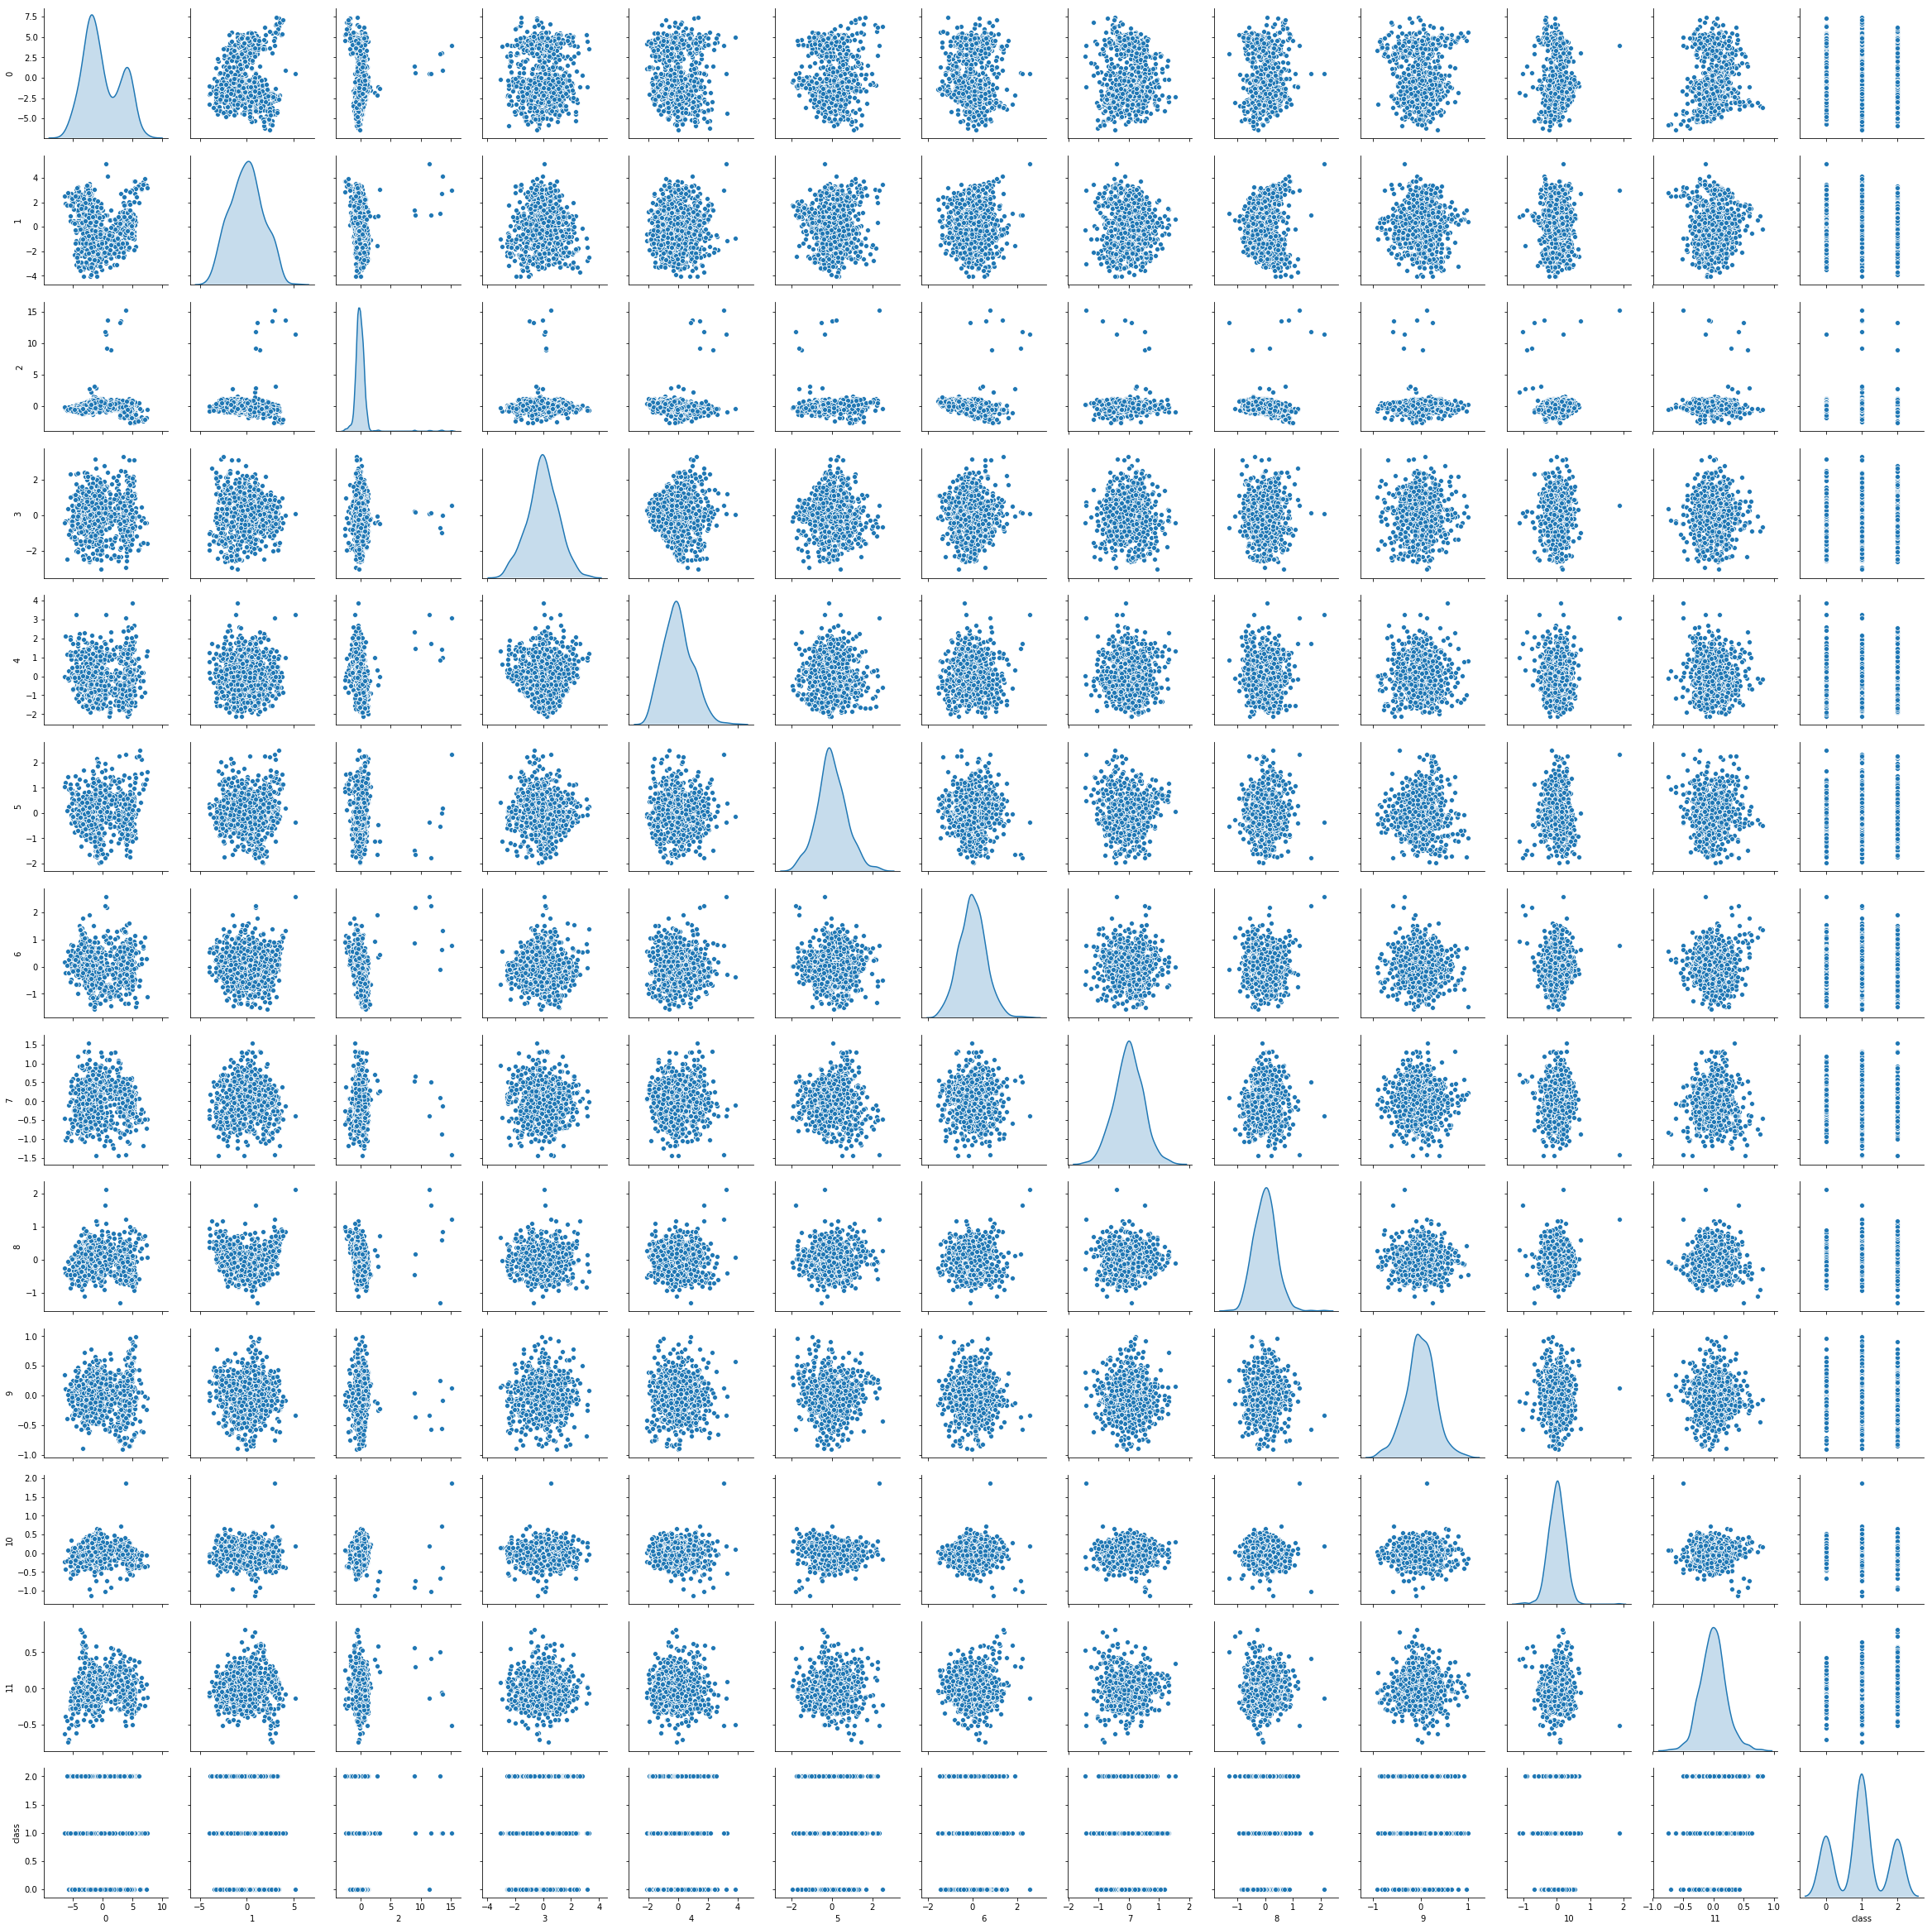

In [54]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(y)

sns.pairplot(finalDF, diag_kind='kde')

In [83]:
#Lets apply SVM on PCA dimensions
Proj_data_mpg_df.dropna(axis=0,inplace=True)
X = finalDF.drop('class', axis=1)  
y = finalDF['class'] 

In [84]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30) 

In [85]:
from sklearn.svm import SVC  
X_train.head()

0         1         2         3         4         5         6   \
189  4.236255  0.910785 -0.357233  0.670667  0.384597 -0.507614 -0.087458   
611 -0.417639 -0.813802  0.032762  1.641767  1.130663 -0.228768 -0.304937   
150 -0.404742 -2.903264  0.123441 -0.479728  0.519722  0.459542  0.460189   
579 -6.381447  2.485981 -0.093063 -0.420157  0.002888  1.048805  0.156851   
707  4.245555 -0.251927 -0.553567  1.128673  0.111497 -0.033553  0.894445   

           7         8         9         10        11        12        13  
189 -0.143743 -0.150437  0.277701 -0.098582  0.221186 -0.110668 -0.140572  
611 -0.058804 -0.193976 -0.373069  0.536090  0.031266 -0.044230 -0.214990  
150  0.163775 -0.316370  0.254564 -0.233965  0.161672 -0.189850  0.137125  
579 -0.458190 -0.249240  0.346464 -0.222366 -0.620550  0.388980  0.139110  
707  0.343684 -0.350492 -0.336165 -0.320544 -0.124188 -0.112043 -0.116788

In [134]:
svclassifier = SVC(C=0.1,kernel='linear')  
svclassifier.fit(X_tr, y_tr)  

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [135]:
y_pred = svclassifier.predict(X_te)

In [136]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_te,y_pred))  
print(classification_report(y_te,y_pred)) 

[[ 63   2   0]
 [  2 123   2]
 [  0   0  52]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       0.98      0.97      0.98       127
           2       0.96      1.00      0.98        52

   micro avg       0.98      0.98      0.98       244
   macro avg       0.97      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



In [137]:
svclassifier.score(X_te,y_te)

0.9754098360655737

In [ ]:
#As per the analysis we should be using the above since that gives best result